In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import forced_phot as fp

In [6]:
datapath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares\ZTF18aanlzzf\clean_g_and_rbatchfp_req0000338768_lc.txt'
testdata = pd.read_csv(datapath,delimiter=' ')

time = testdata['time']
flux,err = fp.flux_jy(testdata)
flux = flux.values
err = err.values
# maxtime = time.iloc[np.argmax(flux)]
# maxflux = np.max(flux)
time = time.values
testdata

,time,flux,zeropoint,filter,flux_unc
0,0.000000,-22.604661,26.3252,ZTF_r,39.342849
1,0.077211,35.063012,26.3226,ZTF_g,36.496439
2,0.097708,-56.032267,26.3097,ZTF_g,41.196958
3,0.119653,57.263025,26.2964,ZTF_g,20.734706
4,0.164375,54.000178,26.2916,ZTF_r,21.263425
...,...,...,...,...,...
2037,1919.001111,330.576986,26.1806,ZTF_g,82.264563
2038,1920.958148,359.652910,26.3856,ZTF_r,67.540161
2039,1920.994248,209.277544,26.2482,ZTF_g,67.576413
2040,1922.955093,213.984818,26.2894,ZTF_g,85.056799


In [15]:
ztf_g, ztf_r = (testdata['filter'] == 'ZTF_g').values, (testdata['filter'] == 'ZTF_r').values


True

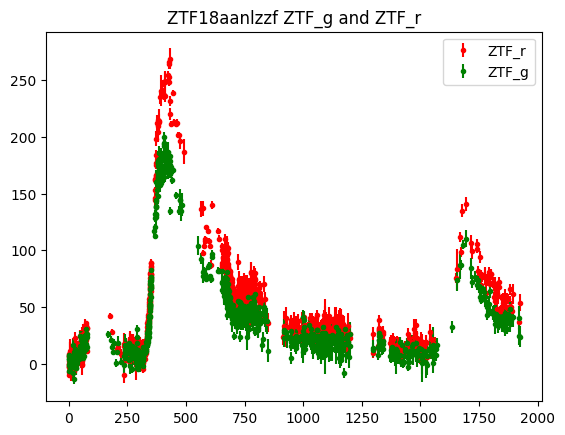

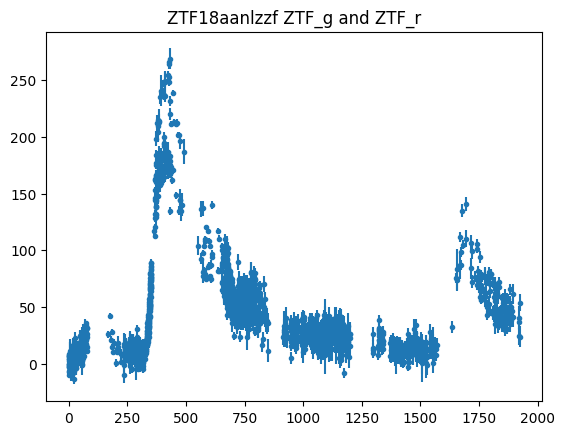

In [21]:
plt.title('ZTF18aanlzzf ZTF_g and ZTF_r')
red = plt.errorbar(time[ztf_r],flux[ztf_r],err[ztf_r],fmt='.',color='red',label='ZTF_r')
green = plt.errorbar(time[ztf_g],flux[ztf_g],err[ztf_g],fmt='.',color='green',label='ZTF_g')
plt.legend()
plt.show()

#not colored
plt.title('ZTF18aanlzzf ZTF_g and ZTF_r')
plt.errorbar(time,flux,err,fmt='.')
plt.show()

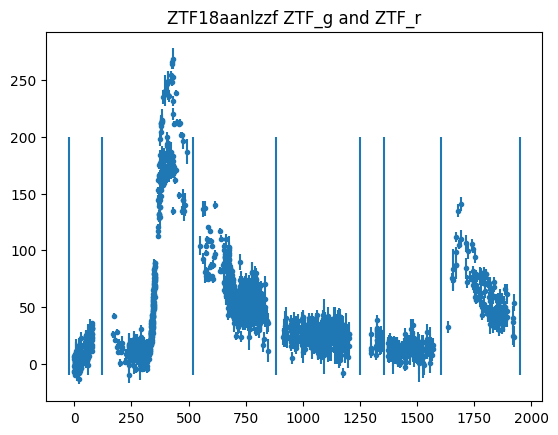

In [86]:
time_diff = np.diff(time)

vert_lines = [(time[i]+time[i+1])/2 for i in np.where(time_diff>25)[0]]
vert_lines = [np.min(time) -25] + vert_lines + [np.max(time) + 25]
plt.title('ZTF18aanlzzf ZTF_g and ZTF_r')
plt.errorbar(time,flux,err,fmt='.')
plt.vlines(vert_lines,-10,200)
plt.show()

In [78]:
print(vert_lines)

[122.19777200021781, 520.6505903003272, 881.6648958001751, 1250.6274305502884, 1356.251464100089, 1602.6313368000556]


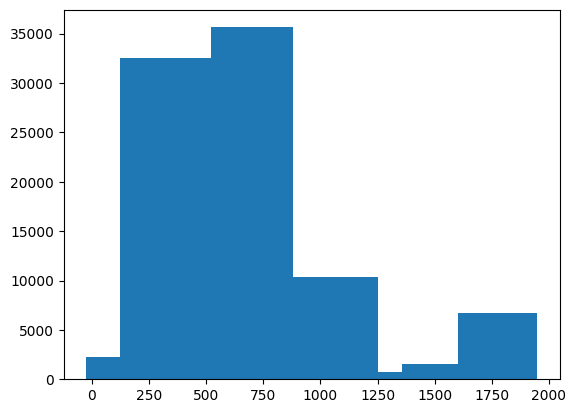

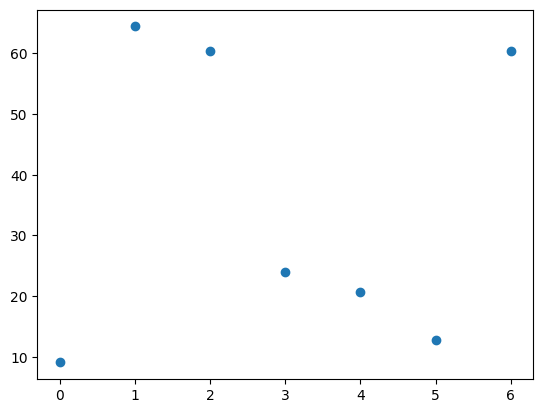

In [101]:
nums,_ = np.histogram(time,vert_lines)
hist = plt.hist(time,vert_lines,weights=flux)
plt.show()
plt.scatter(np.arange(len(hist[0])),hist[0]/nums)

[  9.11780841  23.60676231  10.13510351  54.11552025 192.47068855
 117.00911611  83.84162788  55.56568354  52.53510987  26.95315307
  26.00605522  23.32469357  21.57585916  20.72326021  11.73393169
  13.26000366  14.1894521   93.80444846  64.37476743  45.06530907]


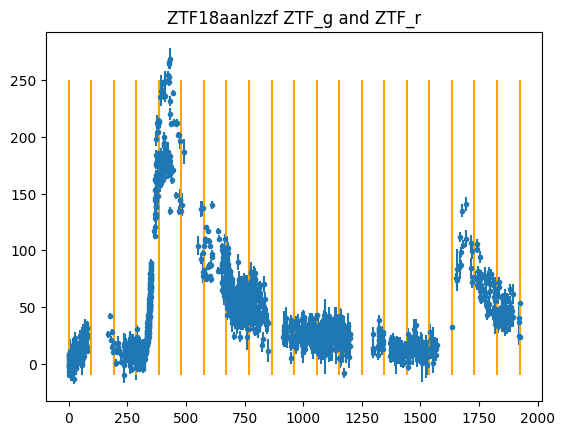

(21,) (20,)


In [163]:
from scipy.stats import binned_statistic 

binned_means,bins,bindex = binned_statistic(time,flux,'mean',20)
print(binned_means)
plt.title('ZTF18aanlzzf ZTF_g and ZTF_r')
plt.errorbar(time,flux,err,fmt='.')
plt.vlines(bins,-10,250,colors='orange')
plt.show()
print(bins.shape,binned_means.shape)

In [169]:
print(np.diff(bins))

[96.14974248 96.14974248 96.14974248 96.14974248 96.14974248 96.14974248
 96.14974248 96.14974248 96.14974248 96.14974248 96.14974248 96.14974248
 96.14974248 96.14974248 96.14974248 96.14974248 96.14974248 96.14974248
 96.14974248 96.14974248]


54.116 - 10.135 =  43.980416731212586 | 1.0
192.471 - 54.116 =  138.35516830291343 | 1.0
384.59896990004927
13.260 - 11.734 =  1.5260719633022894 | 1.0
14.189 - 13.260 =  0.9294484467916746 | 1.0
1538.395879600197
[288.44922742503695, 1442.2461371251848]


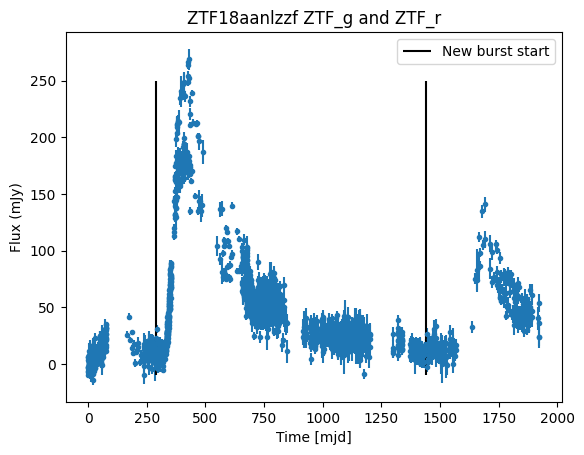

In [194]:
def burst_separator(binned_means,bins):
    lower_bounds = []
    lower = 1
    while lower < len(binned_means):

        flag = False
        for i in range(lower,len(binned_means)):
            if (binned_means[i] - binned_means[i-1]) > 0:
                if (binned_means[i+1] - binned_means[i] > 0):
                    print(f'{binned_means[i]:.3f} - {binned_means[i-1]:.3f} = ',binned_means[i] - binned_means[i-1], '|', diff[i-1])
                    print(f'{binned_means[i+1]:.3f} - {binned_means[i]:.3f} = ',binned_means[i+1] - binned_means[i], '|', diff[i])
                    print(bins[i+1])
                    flag = True
                    break
        lower = i + 1 + 2 #+2 to say we've found an average rise, now go two bins further to pass over this burst and continue the search for a rise
        if flag:
            lower_bounds.append(bins[i]) #save the found lower bound but only if a rise was found otherwise the third to last bin will also be saved (in this case index 18)
    return lower_bounds

lower_bounds = burst_separator(binned_means,bins)
print(lower_bounds)
plt.title('ZTF18aanlzzf ZTF_g and ZTF_r')
plt.errorbar(time,flux,err,fmt='.')
plt.vlines(lower_bounds,-10,250,colors='black',label='New burst start')
# plt.vlines(bins,-10,250,colors='green',alpha=0.5)
plt.ylabel(f'Flux (mJy)')
plt.xlabel(f'Time [mjd]')
plt.legend()
plt.show()


9.949 - -5.187 =  15.135975335267599 | 1.0
223.702 - 9.949 =  213.75276246178615 | 1.0
385.7914745399728
62.794 - 53.998 =  8.795513553858257 | -1.0
138.589 - 62.794 =  75.79481711436632 | -1.0
868.0308177149388
[289.3436059049796, 771.5829490799456]


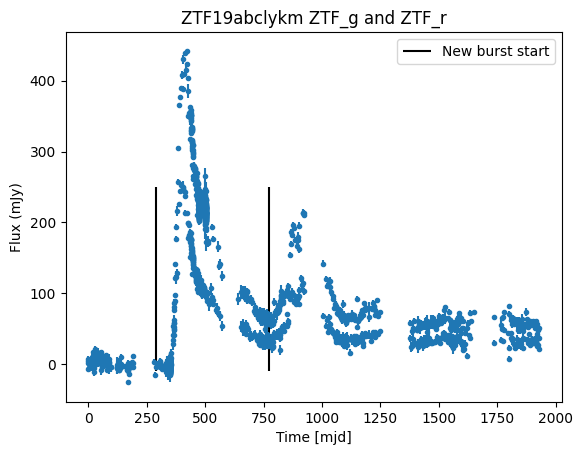

In [195]:
datapath2 = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares\ZTF19abclykm\clean_g_and_rbatchfp_req0000338764_lc.txt'
testdata2 = pd.read_csv(datapath2,delimiter=' ')

time2 = testdata2['time']
flux2,err2 = fp.flux_jy(testdata2)
flux2 = flux2.values
err2 = err2.values
# maxtime = time.iloc[np.argmax(flux)]
# maxflux = np.max(flux)
time2 = time2.values


binned_means2,bins2,bindex2 = binned_statistic(time2,flux2,'mean',20)

lower_bounds2 = burst_separator(binned_means2,bins2)
print(lower_bounds2)
plt.title('ZTF19abclykm ZTF_g and ZTF_r')
plt.errorbar(time2,flux2,err2,fmt='.')
plt.vlines(lower_bounds2,-10,250,colors='black',label='New burst start')
# plt.vlines(bins2,-10,250,colors='green',alpha=0.5)
plt.ylabel(f'Flux (mJy)')
plt.xlabel(f'Time [mjd]')
plt.legend()
plt.show()